In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('compresive_strength_concrete.csv')

In [4]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.isnull().any()

Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

In [19]:
np.where(df.applymap(lambda x: x == ''))
X_train = df.sample(frac = 0.7, random_state = 123)
X_test = df.drop(X_train.index)
X_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
134,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.33
996,152.6,238.7,0.0,200.0,6.3,1001.8,683.9,28,26.86
770,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3,14.99
937,313.3,0.0,113.0,178.5,8.0,1001.9,688.7,28,36.80


In [20]:
Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:-1]
Y_test = X_test.iloc[:,-1]
X_test = X_test.iloc[:,0:-1]
X_mean = X_train.mean()
X_train -= X_mean
X_std = X_train.std()
X_train /= X_std
X_test -= X_mean
X_test /= X_std
Y_mean = Y_train.mean()
Y_train -= Y_mean
Y_std = Y_train.std()
Y_train /= Y_std
Y_test -= Y_mean
Y_test /= Y_std
X_train.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                float64
dtype: object

In [21]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

In [22]:
network = models.Sequential()
network.add(layers.Dense(128,activation="relu",input_shape=(X_train.shape[1],)))
network.add(layers.Dense(64,activation="relu"))
network.add(layers.Dense(32,activation="relu"))
network.add(layers.Dense(1))

In [24]:
network.compile(optimizer="rmsprop",loss=["mse"],metrics=["mae"])
history = network.fit(X_train,Y_train,epochs=200,validation_split=0.3, batch_size = 16)


Epoch 1/200
32/32 [==============================] - 1s 6ms/step - loss: 0.7803 - mae: 0.6949 - val_loss: 0.4614 - val_mae: 0.5615
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3621 - mae: 0.4790 - val_loss: 0.3595 - val_mae: 0.4775
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2699 - mae: 0.3914 - val_loss: 0.2699 - val_mae: 0.4145
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1829 - mae: 0.3432 - val_loss: 0.2608 - val_mae: 0.3978
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1689 - mae: 0.3257 - val_loss: 0.2505 - val_mae: 0.3937
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1393 - mae: 0.3015 - val_loss: 0.2414 - val_mae: 0.3691
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 0.1245 - mae: 0.2729 - val_loss: 0.2250 - val_mae: 0.3673
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1220 - m

32/32 [==============================] - 0s 3ms/step - loss: 0.0359 - mae: 0.1293 - val_loss: 0.1394 - val_mae: 0.2740
Epoch 64/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0342 - mae: 0.1247 - val_loss: 0.1241 - val_mae: 0.2704
Epoch 65/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0280 - mae: 0.1242 - val_loss: 0.1263 - val_mae: 0.2714
Epoch 66/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0315 - mae: 0.1269 - val_loss: 0.1592 - val_mae: 0.2916
Epoch 67/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0339 - mae: 0.1363 - val_loss: 0.1307 - val_mae: 0.2706
Epoch 68/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0349 - mae: 0.1285 - val_loss: 0.1229 - val_mae: 0.2659
Epoch 69/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0286 - mae: 0.1202 - val_loss: 0.1259 - val_mae: 0.2688
Epoch 70/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0313 - mae: 0

Epoch 125/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0196 - mae: 0.1016 - val_loss: 0.1154 - val_mae: 0.2488
Epoch 126/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0236 - mae: 0.1099 - val_loss: 0.1199 - val_mae: 0.2554
Epoch 127/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0208 - mae: 0.0998 - val_loss: 0.1267 - val_mae: 0.2614
Epoch 128/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0225 - mae: 0.1034 - val_loss: 0.1525 - val_mae: 0.2761
Epoch 129/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0276 - mae: 0.1157 - val_loss: 0.1100 - val_mae: 0.2441
Epoch 130/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0258 - mae: 0.1103 - val_loss: 0.1265 - val_mae: 0.2658
Epoch 131/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0279 - mae: 0.1080 - val_loss: 0.1159 - val_mae: 0.2464
Epoch 132/200
32/32 [==============================] - 0s 3ms/step - 

32/32 [==============================] - 0s 3ms/step - loss: 0.0161 - mae: 0.0846 - val_loss: 0.1133 - val_mae: 0.2474
Epoch 187/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0223 - mae: 0.0980 - val_loss: 0.1055 - val_mae: 0.2365
Epoch 188/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0134 - mae: 0.0771 - val_loss: 0.1104 - val_mae: 0.2419
Epoch 189/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0185 - mae: 0.0913 - val_loss: 0.1172 - val_mae: 0.2509
Epoch 190/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0164 - mae: 0.0863 - val_loss: 0.1220 - val_mae: 0.2560
Epoch 191/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0170 - mae: 0.0891 - val_loss: 0.1073 - val_mae: 0.2506
Epoch 192/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0182 - mae: 0.0924 - val_loss: 0.1124 - val_mae: 0.2467
Epoch 193/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0214 -

In [25]:
history.history.keys()
loss,mae=network.evaluate(X_test,Y_test)
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

10/10 [==============================] - 0s 1ms/step - loss: 0.1147 - mae: 0.2246


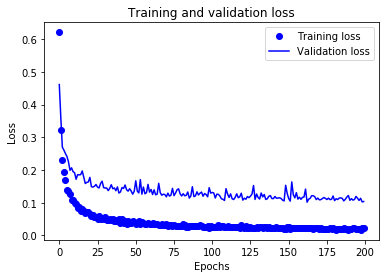

In [26]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(200)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

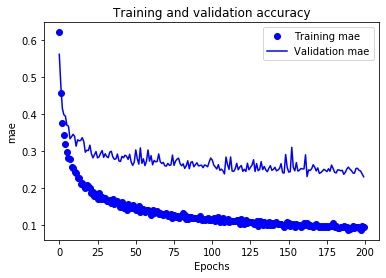

In [27]:
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()